# Imbalanced Classes

- A classification problem in machine learning is where we have given some input (independent variables), and we have to predict a discrete target. 
- It is highly possible that the distribution of discrete values will be very different. Due to this difference in each class, the algorithms tend to get biased towards the majority values present and don’t perform well on the minority values.

- This difference in class frequencies affects the overall predictability of the model.

- Getting good accuracy on these problems is not very difficult, but it is not always about getting a good score. We need to check whether the performance of these models makes any business sense or have any value. 
- That is why it is essential to understand problem statement and data so that you could use the right metric and optimize it using suitable methods.
 
- It merely tells that the target class’s frequency is highly imbalanced, i.e., the occurrence of one of the classes is very high compared to the other classes present. 
- In other words, there is a bias or skewness towards the majority class present in the target.

# Techniques to deal with Imbalanced Classes 

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import SCORERS, accuracy_score,f1_score,confusion_matrix,roc_auc_score
from sklearn.model_selection import train_test_split

from collections import Counter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

**Fradulant and Non-Fradulant Data**

In [8]:
data_0=df[df['Class']==0]
data_1=df[df['Class']==1]

In [9]:
# take only 10000 samples 

data_0=data_0.sample(n=10000)

In [10]:
df=data_1.append(data_0)

In [12]:
df.Class.value_counts()

0    10000
1      492
Name: Class, dtype: int64

In [13]:
count=df.Class.value_counts()
print('Number of Fradulant "1" :',count[1])
print('Number of Non-Fradulant "0" :', count[0])

Number of Fradulant "1" : 492
Number of Non-Fradulant "0" : 10000


In [14]:
# percentage of fradulant:
(count[1]/count[0])*100


4.92

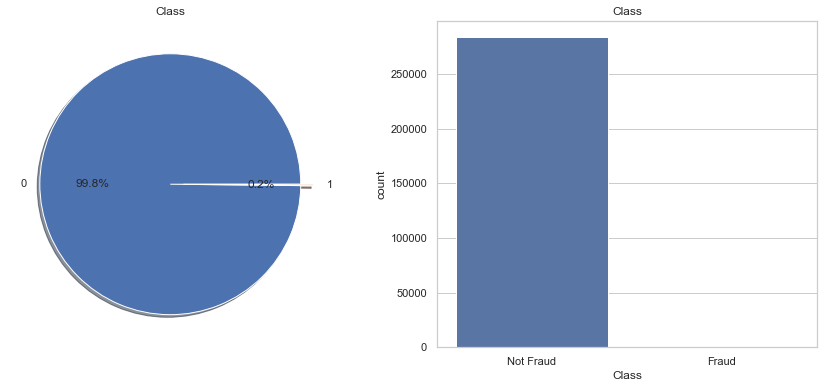

In [21]:
f,ax=plt.subplots(1,2,figsize=(15,6))
df['Class'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Class')
ax[0].set_ylabel('')
sns.countplot(x=df['Class'],ax=ax[1])
ax[1].set_title('Class')
ax[1].set_xticklabels(['Not Fraud', 'Fraud']);

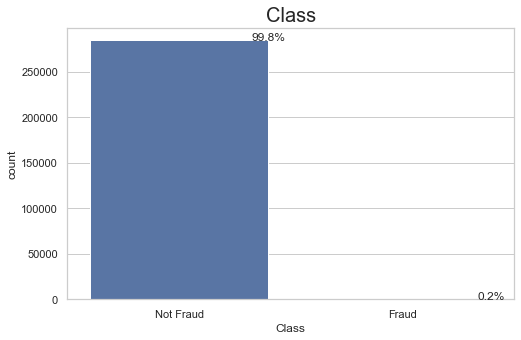

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
total = float(len(df))
ax = sns.countplot(x="Class", data=df)
plt.title('Class', fontsize=20)
ax.set_xticklabels(['Not Fraud', 'Fraud'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

In [16]:
X=df.drop('Class',axis=1)
y=df.Class

In [6]:
total = float(len(df))
total

284807.0

In [17]:
print(X.shape)
print(y.shape)

(10492, 30)
(10492,)


In [18]:
one = np.where(y==1)
zero = np.where(y==0)
len(one[0]), len(zero[0])

(492, 10000)

**Train Test Split**

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)

**Logistic Regression Model**

In [20]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [21]:
y_pred=model.predict(X_test)

In [69]:
print('Accuracy Score:', accuracy_score(y_pred,y_test))

Accuracy Score: 0.9861838970938542


In [70]:
np.unique(y_pred)

array([0, 1], dtype=int64)

# Matrics Trap

- One of the major issues that new developer users fall into when dealing with unbalanced datasets relates to the metrics used to evaluate their model. 
- Using simpler metrics like accuracy score can be misleading. In a dataset with highly unbalanced classes, the classifier will always “predicts” the most common class without performing any analysis of the features and it will have a high accuracy rate, obviously not the correct one.

In [10]:
!pip install xgboost

In [15]:
from xgboost import XGBClassifier

In [29]:
model=XGBClassifier()

In [30]:
model.fit(X_train,y_train)

[19:48:55] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

**Model Performance**

In [37]:
xgb_y_predict=xgb_model.predict(X_test)
xgb_score=accuracy_score(xgb_y_predict,y_test)
print('Accuracy score is:', xgb_score)
print('Roc auc scote:', roc_auc_score(xgb_y_predict, y_test))
print('F1 core:',f1_score( y_test,xgb_y_predict))

Accuracy score is: 0.9996313331694814
Roc auc scote: 0.9934950866279596
F1 core: 0.8813559322033897


In [38]:
confusion_matrix( y_test,xgb_y_predict)

array([[56863,     1],
       [   20,    78]], dtype=int64)

In [40]:
print();print(model)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


# Resampling Techniques

- One of the widely adopted class imbalance techniques for dealing with highly unbalanced datasets is called resampling.
- It consists of removing samples from the majority class (under-sampling) and/or adding more examples from the minority class (over-sampling).
- The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfishing.
- In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.



In [88]:
class_count_0, class_count_1=df['Class'].value_counts()

print(class_count_0)
print(class_count_1)


10000
492


In [89]:
class_0=df[df['Class']==0]
class_1=df[df['Class']==1]

print(class_0.shape)
print(class_1.shape)

(10000, 31)
(492, 31)


# Random Under Sampling

- Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out.

- Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

In [96]:
class_0_under=class_0.sample(class_count_1)
test_under=pd.concat([class_0_under,class_1],axis=0)
print('Total class of 1 and 0:\n',test_under['Class'].value_counts())

Total class of 1 and 0:
 0    492
1    492
Name: Class, dtype: int64


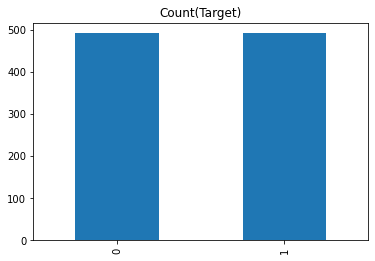

In [98]:
test_under['Class'].value_counts().plot(kind='bar',title='Count(Target)');

# Random Over-Sampling

- Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

- A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.



In [100]:
class_1_over=class_1.sample(class_count_0,replace=True)
test_under=pd.concat([class_1_over,class_0],axis=0)
print('Total class of 1 and 0:\n',test_under['Class'].value_counts())

Total class of 1 and 0:
 1    10000
0    10000
Name: Class, dtype: int64


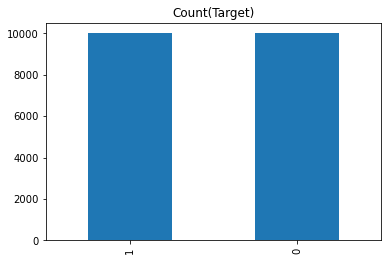

In [102]:
test_under['Class'].value_counts().plot(kind='bar',title='Count(Target)');

# Random under-sampling with imblearn

- `RandomUnderSampler` is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes. 
- Under-sample the majority class(es) by randomly picking samples with or without replacement.

In [4]:
pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [23]:
from imblearn.under_sampling import RandomUnderSampler

In [24]:
rus=RandomUnderSampler(random_state=42)
X_train_rus,y_train_rus=rus.fit_resample(X_train,y_train)
print('Original dataset shape:',Counter(y_train))
print('Resample dataset shape:',Counter(y_train_rus))

Original dataset shape: Counter({0: 8007, 1: 386})
Resample dataset shape: Counter({0: 386, 1: 386})


# Random over-sampling with imblearn

- One way to fight imbalance data is to generate new samples in the minority classes. 
- The most naive strategy is to generate new samples by randomly sampling with replacement of the currently available samples. 
- The `RandomOverSampler` offers such a scheme.

In [25]:
from imblearn.over_sampling import RandomOverSampler

In [26]:
ros=RandomOverSampler(random_state=42)
X_train_ros,y_train_ros=ros.fit_resample(X_train,y_train)
print('Original dataset shape:',Counter(y_train))
print('Resample dataset shape:',Counter(y_train_ros))

Original dataset shape: Counter({0: 8007, 1: 386})
Resample dataset shape: Counter({0: 8007, 1: 8007})


# Under-Sampling Tomek Links

- Tomek links are pairs of very close instances but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.

- Tomek’s link exists if the two samples are the nearest neighbors of each other

In [27]:
from imblearn.under_sampling import TomekLinks

In [127]:
tl=TomekLinks(sampling_strategy='majority')
x_tl,y_tl=tl.fit_resample(X,y)
print('Original dataset shape:',Counter(y))
print('Resample dataset shape:',Counter(y_tl))

Original dataset shape: Counter({0: 10000, 1: 492})
Resample dataset shape: Counter({0: 9855, 1: 492})


In [29]:
tl=TomekLinks(sampling_strategy='majority')
X_train_tl,y_train_tl=tl.fit_resample(X_train,y_train)
print('Original dataset shape:',Counter(y_train))
print('Resample dataset shape:',Counter(y_train_tl))

Original dataset shape: Counter({0: 8007, 1: 386})
Resample dataset shape: Counter({0: 7882, 1: 386})


# Synthetic Minority Over-Sampleing Technique (SMOTE)

- This technique generates synthetic data for the minority class.

- SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

- SMOTE algorithm works in 4 simple steps:

1. Choose a minority class as the input vector
2. Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
3. Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
4. Repeat the steps until data is balanced



In [30]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)
print('Original dataset shape:',Counter(y_train))
print('Resample dataset shape:',Counter(y_train_smote))

Original dataset shape: Counter({0: 8007, 1: 386})
Resample dataset shape: Counter({0: 8007, 1: 8007})


# NearMiss

- NearMiss is an under-sampling technique.  
- Instead of resampling the Minority class, using a distance, this will make the majority class equal to the minority class.

In [31]:
from imblearn.under_sampling import NearMiss
nm=NearMiss()
X_train_nm,y_train_nm=nm.fit_resample(X_train,y_train)
print('Original dataset shape:',Counter(y_train))
print('Resample dataset shape:',Counter(y_train_nm))

Original dataset shape: Counter({0: 8007, 1: 386})
Resample dataset shape: Counter({0: 386, 1: 386})


# Change the Performance Metric

Accuracy is not the best metric to use when evaluating imbalanced datasets as it can be misleading.

Metrics that can provide better insight are:

- **Confusion Matrix**: a table showing correct predictions and types of incorrect predictions.
- **Precision**: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
- **Recall**: the number of true positives divided by the number of positive values in the test data. The recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
- **F1 Score**: the weighted average of precision and recall.
- **Area Under ROC Curve (AUROC)**: AUROC represents the likelihood of your model distinguishing observations from two classes.

In [42]:
X_trian,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
model = XGBClassifier()
model.fit(X_train, y_train)
xgb_y_predict = model.predict(X_test)

[20:17:51] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


**Model Performance**

In [ ]:
print('Roc_Auc score:',roc_auc_score(y_test, xgb_y_predict))
print('Accuracy score:',accuracy_score(y_test, xgb_y_predict))
print('F1 score:',f1_score(y_test, xgb_y_predict))

# Penalize Algorithm (Cost-Sensitive Training)

The next tactic is to use penalized learning algorithms that increase the cost of classification mistakes on the minority class.

A popular algorithm for this technique is Penalized-SVM.

During training, we can use the argument class_weight=’balanced’ to penalize mistakes on the minority class by an amount proportional to how under-represented it is.

We also want to include the argument probability=True if we want to enable probability estimates for SVM algorithms.

Let’s train a model using Penalized-SVM on the original imbalanced dataset:

In [ ]:
from sklearn.svm import SVC
model=SVC(class_weight='balanced',probability=True)
model.fit(X_train,y_train)

In [ ]:
y_pred=model.predict(X_test)

**Model Performance**

In [ ]:
print('Roc_Auc score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

# Change the Algorithm


While in every machine learning problem, it’s a good rule of thumb to try a variety of algorithms, it can be especially beneficial with imbalanced datasets.

Decision trees frequently perform well on imbalanced data. In modern machine learning, tree ensembles (Random Forests, Gradient Boosted Trees, etc.) almost always outperform singular decision trees, so we’ll jump right into those:

Tree base algorithm work by learning a hierarchy of if/else questions. This can force both classes to be addressed.

**Tree Based Algorithm**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

In [ ]:
y_pred=rfc.predict(X_test)

**Model Performance**

In [ ]:
print('Roc_Auc score:',roc_auc_score(y_test, y_pred))
print('Accuracy score:',accuracy_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred))

# Conclusion:
- Thus all the techniques, to handle imbalanced data, along with their implementation are covered. 
- After analyzing all the outputs we can say that oversampling tends to work better in handling the imbalanced data. 
- However, it is always recommended to use both, Undersampling and Oversampling to balance the skewness of the imbalanced data.

1. Imbalanced data affects the performance of the classification model.
2. Thus to handle the imbalanced data, Sampling techniques are used.
3. There are two types of sampling techniques available: Undersampling and Oversampling.
4. Undersampling selects the instances from the majority class to keep and delete.
5. Oversampling generates the new synthesis examples from the minority class using neighbors and density distribution criteria.
6. It is recommended to use both techniques altogether to get better results for the model performance.
